### Hind Ali  


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d
# Seaborn is a Python data visualization library based on matplotlib. It provides a high-level interface for drawing 
import seaborn as sns

# https://scikit-learn.org/stable/modules/preprocessing.html
from sklearn.preprocessing import scale

#https://scikit-learn.org/stable/modules/linear_model.html
import sklearn.linear_model as skl_lm
from sklearn.metrics import mean_squared_error, r2_score

# statsmodels is a Python module that provides classes and functions for the estimation of many different statistical models,
#as well as for conducting statistical tests, and statistical data exploration. 
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [2]:
df1 = pd.read_excel('Housing Data.xlsx', sheet_name='Train set')

In [3]:
df1.head(10)

,X1,X2,X3,X4,y
0,2622,1071,1,1,2105
1,2922,900,2,1,1740
2,4815,1125,1,1,2020
3,3546,927,0,1,1710
4,4323,909,3,0,1663
5,4014,1206,0,0,2302
6,3177,1251,0,1,2626
7,1236,1035,1,1,2204
8,2847,1008,1,1,2094
9,3576,1143,1,1,2004


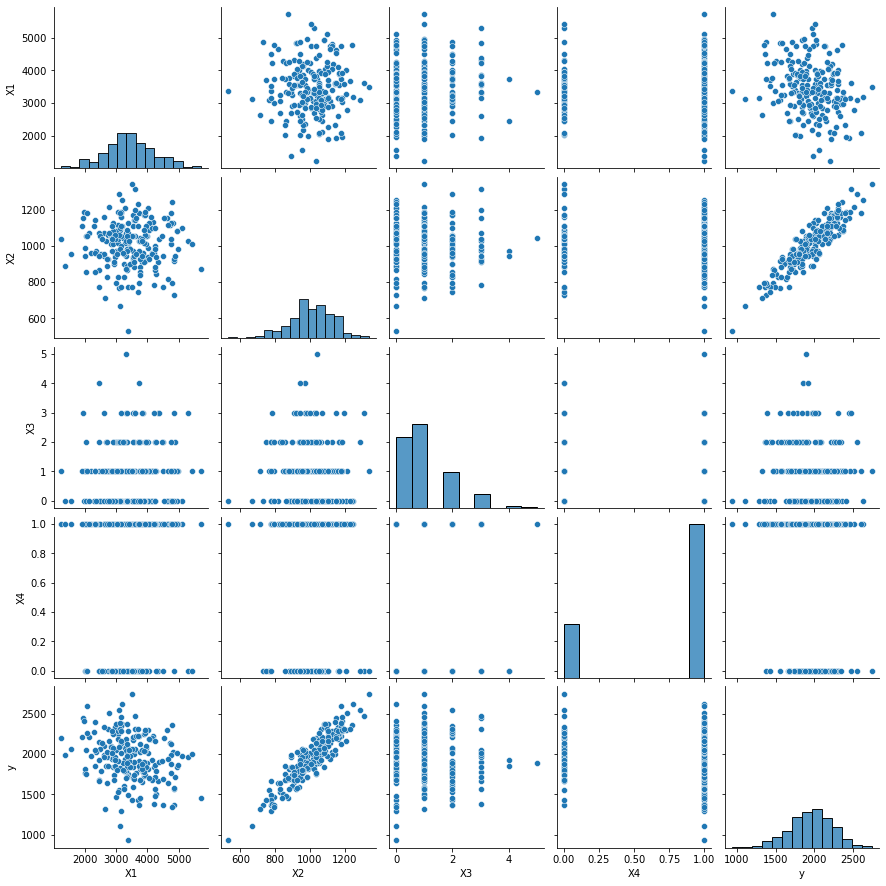

In [4]:
sns.pairplot(df1[['X1','X2','X3','X4','y']]);

C:\Users\Hind Ali\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='X1', ylabel='y'>

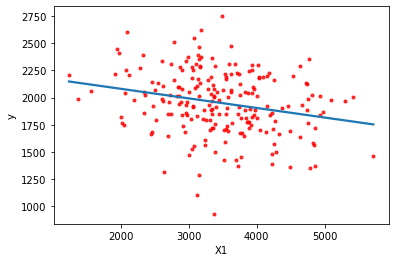

In [5]:

sns.regplot(df1.X1, df1.y, order = 1,ci= None,scatter_kws={'color':'r', 's':9} )

C:\Users\Hind Ali\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='X2', ylabel='y'>

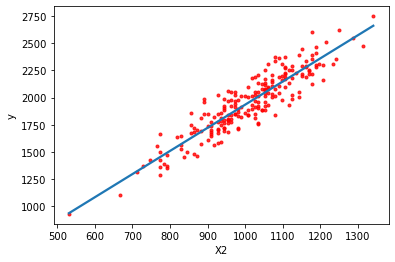

In [6]:

sns.regplot(df1.X2, df1.y, order = 1,ci= None,scatter_kws={'color':'r', 's':9} )

C:\Users\Hind Ali\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='X3', ylabel='y'>

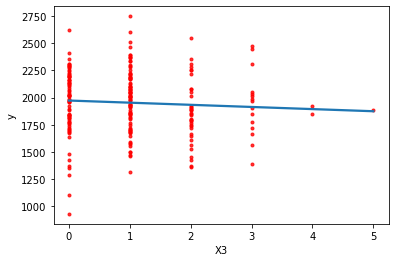

In [7]:

sns.regplot(df1.X3, df1.y, order = 1,ci= None,scatter_kws={'color':'r', 's':9} )

C:\Users\Hind Ali\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='X4', ylabel='y'>

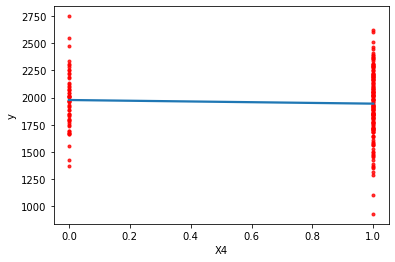

In [8]:

sns.regplot(df1.X4, df1.y, order = 1,ci= None,scatter_kws={'color':'r', 's':9} )

### 1. Using a tool of your choice fit a linear regression model using the training data. Keep in mind you will need to make predictions based on this model in later steps.
#### a. A prediction model to predict housing prices (y) using any one of the available variables. (1 Mark)


In [9]:
regr = skl_lm.LinearRegression()
X = df1.X2.values.reshape(-1,1)
y = df1.y

regr.fit(X,y)
print(regr.intercept_)
print(regr.coef_)

-195.15436086845853
[2.12952638]


In [10]:
house_pred = regr.predict(X)
house_pred 

array([2085.56838804, 1721.41937771, 2200.56281235, 1778.91658986,
       1740.58511509, 2373.05444882, 2468.88313575, 2008.90543849,
       1951.40822634, 2238.89428712, 1740.58511509, 1817.24806464,
       1855.57953941, 2181.39707497, 1491.43052908, 2008.90543849,
       2066.40265065, 2277.22576189, 2028.07117588, 1683.08790294,
       2238.89428712, 1433.93331692, 1855.57953941, 1721.41937771,
       2028.07117588,  935.62414489, 1817.24806464, 1568.09347862,
       1740.58511509, 1932.24248895, 2104.73412542, 2066.40265065,
       2123.89986281, 1817.24806464, 1778.91658986, 1798.08232725,
       2162.23133758, 2258.06002451, 2047.23691327, 1548.92774124,
       2162.23133758, 2008.90543849, 1970.57396372, 1759.75085248,
       2181.39707497, 1989.73970111, 1989.73970111, 1644.75642816,
       2449.71739837, 2373.05444882, 2219.72854974, 1970.57396372,
       2028.07117588, 1989.73970111, 1702.25364032, 2334.72297405,
       1644.75642816, 1836.41380202, 1893.91101418, 1453.09905

In [11]:
r2_score(y,house_pred)

0.8359897060624918

In [12]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y,house_pred , squared = False)

117.80731752341045

#### b. A prediction model to predict housing prices (y) using variables (X1, X2), based on the training set. (2 Marks)


In [13]:
regr_m = skl_lm.LinearRegression()
X = df1[['X1','X2']]
y = df1.y

regr_m.fit(X,y)
print(regr_m.intercept_)
print(regr_m.coef_)

102.33358589971954
[-0.08450792  2.12371735]


In [14]:
house_pred = regr_m.predict(X)
house_pred 

array([2155.25510393, 1766.74706173, 2084.60997538, 1771.35448897,
       1667.46492399, 2324.32192338, 2490.6223319 , 2195.92925448,
       2002.44662928, 2227.54219874, 1710.56396245, 1730.22846573,
       1797.1035624 , 2072.5951844 , 1530.03339916, 2013.64567417,
       2126.50774507, 2301.00891305, 2038.59017669, 1657.27997412,
       2224.24638991, 1466.35493685, 1792.79365855, 1739.87354364,
       2034.5337966 ,  944.81327296, 1829.60977795, 1602.93789113,
       1734.90224299, 1866.45872179, 2145.97389943, 2079.85937403,
       2073.81880354, 1780.42616935, 1744.22744712, 1791.22851638,
       2185.06055744, 2384.57257795, 2002.18193034, 1449.71036826,
       2153.8771355 , 1930.48988232, 1977.44695194, 1643.22581791,
       2213.55439254, 1965.12346238, 1833.29110944, 1654.03934012,
       2337.14128527, 2385.928196  , 2157.47046771, 1983.53152208,
       2046.44941311, 2000.61678817, 1765.38026849, 2458.23764119,
       1729.08237179, 1915.14645806, 1826.96419074, 1460.36954

In [15]:
r2_score(y,house_pred)

0.8881041601425701

In [16]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y,house_pred , squared = False)

97.30691049722017

In [17]:
est = smf.ols('y ~ X1 + X2 + X3 + X4', df1).fit()
est.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.890
Model:                            OLS   Adj. R-squared:                  0.887
Method:                 Least Squares   F-statistic:                     425.0
Date:                Mon, 10 Jul 2023   Prob (F-statistic):           1.04e-99
Time:                        12:03:03   Log-Likelihood:                -1293.9
No. Observations:                 216   AIC:                             2598.
Df Residuals:                     211   BIC:                             2615.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    125.6718     63.436      1.981      0.049       0.623     250.721
X1            -0.0839      0.008     -9.896      0.000      -0.101      -0.067
X2             2.1203      0.053     39.762      0.000       2.015       2.225
X3            -8.3071      6.846     -1.213      0.226     -21.803       5.189
X4           -18.2936     15.201     -1.203      0.230     -48.259      11.671
==============================================================================
Omnibus:                        0.299   Durbin-Watson:                   2.302
Prob(Omnibus):                  0.861   Jarque-Bera (JB):                0.449
Skew:                          -0.035   Prob(JB):                        0.799
Kurtosis:                       2.788   Cond. No.                     3.51e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.51e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#### c. Which of the two models shows better performance over the training set? (1 Mark)


###### From the two model the best model from a(y= aX2 + b) ,b(y= aX1 + bX2+ c) :
###### by observing in the plot X2 is fit the linear regression which i used it in a.
###### The R² value ranges from 0 to 1, with higher values denoting a strong fit, and lower values denoting a weak fit.
###### a has (0.8359897060624918),b has (0.8881041601425701) both of them has higher R2 value.
###### RMSE the best model that has a fairly low error, a has(117.80731752341045) and b has (97.30691049722017), 
###### that means since b has a lower error and higher R2 indicate is the best model.
###### the goal is error reduction in prediction or forecasting, linear regression can be used to fit a predictive model.
###### Also when we look at P-value of X1, X2 is 0,a low p-value indicates that the results are statistically significant, that is in general the p-value ###### is less than 0.05.

#### d. What criteria did you use to determine this? (1 Mark)

by observation in the plot, R2,  p-value, RMSE

### 2. Model Evaluation and Selection
#### a. Apply both of the linear regression models from the previous question on the test set. (2 Marks)


In [18]:
df2 = pd.read_excel('Housing Data.xlsx', sheet_name='Test set')
df2.head(5)

,X1,X2,X3,X4,y
0,4203,1125,0,1,2212
1,2676,963,3,0,1982
2,3165,1170,1,1,2314
3,3471,1053,0,1,2240
4,4461,1080,0,1,2034


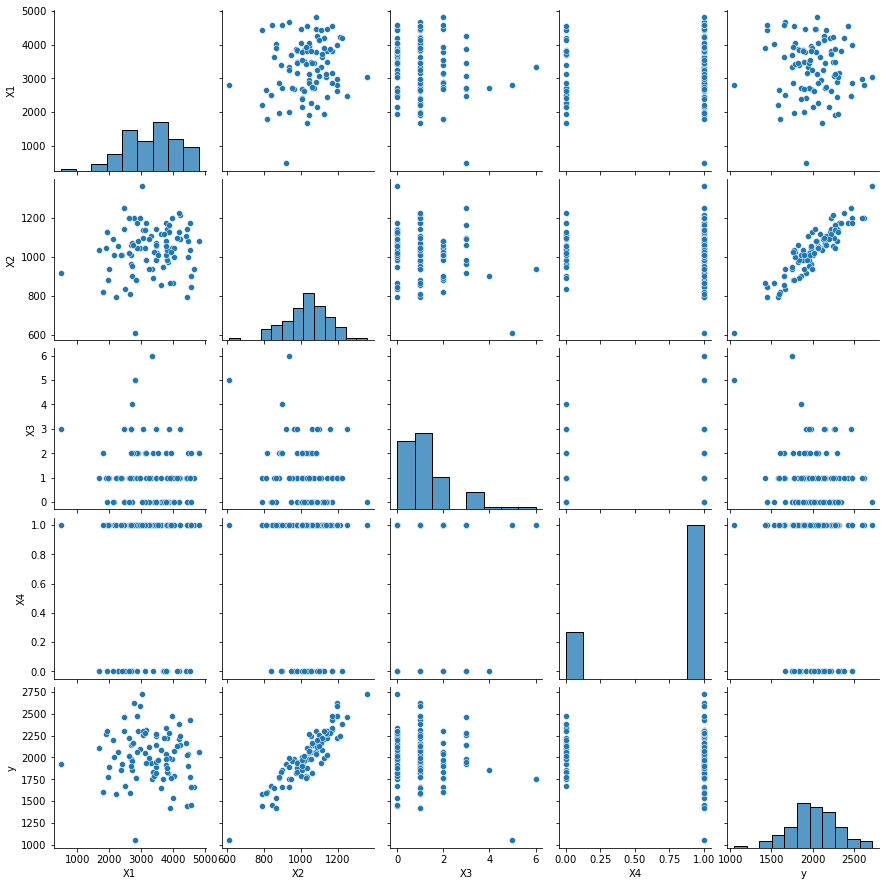

In [19]:
sns.pairplot(df2[['X1','X2','X3','X4','y']]);

In [20]:
regr = skl_lm.LinearRegression()
X = df2.X2.values.reshape(-1,1)
y = df2.y

regr.fit(X,y)
print(regr.intercept_)
print(regr.coef_)

-244.29518703885856
[2.18236343]


In [21]:
house_pred = regr.predict(X)
house_pred 

array([2210.86367145, 1857.32079583, 2309.07002579, 2053.73350451,
       2112.65731711, 1798.39698323, 2171.58112972, 1818.0382541 ,
       1091.31123198, 2034.09223364, 1798.39698323, 2171.58112972,
       1935.8858793 , 2034.09223364, 2014.45096277, 1719.83189976,
       1896.60333757, 2073.37477538, 1759.11444149, 2367.9938384 ,
       2191.22240059, 1484.13664934, 1955.52715017, 2034.09223364,
       1680.54935802, 1975.16842104, 2093.01604625, 2034.09223364,
       2112.65731711, 2485.84146361, 2250.14621319, 2151.93985885,
       1700.19062889, 2132.29858798, 1876.9620667 , 1896.60333757,
       2367.9938384 , 1896.60333757, 2210.86367145, 1896.60333757,
       1582.34300368, 2053.73350451, 2309.07002579, 1484.13664934,
       1955.52715017, 2191.22240059, 1798.39698323, 2112.65731711,
       2407.27638013, 2093.01604625, 2309.07002579, 1680.54935802,
       2250.14621319, 1837.67952496, 2367.9938384 , 2309.07002579,
       1975.16842104, 2034.09223364, 1641.26681628, 2250.14621

In [22]:
r2_score(y,house_pred)

0.8400605605938344

In [23]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y,house_pred , squared = False)

112.9102305736282

In [24]:
regr_m = skl_lm.LinearRegression()
X = df2[['X1','X2']]
y = df2.y

regr_m.fit(X,y)
print(regr_m.intercept_)
print(regr_m.coef_)

-68.61933263506785
[-0.07450069  2.25133296]


In [25]:
house_pred = regr_m.predict(X)
house_pred 

array([2151.00384673, 1900.05046107, 2329.64554632, 2043.4423788 ,
       2030.47268546, 1789.6470115 , 2093.94070023, 1784.87677625,
       1099.7749989 , 2139.84846295, 1690.63559428, 2175.51895596,
       1847.66771156, 2061.17573414, 2136.3491216 , 1755.53445974,
       1881.1229036 , 2121.14440756, 1962.56749553, 2418.59279713,
       2172.76023934, 1383.20630331, 2039.8028004 , 1986.07903846,
       1704.058865  , 1959.26536325, 2140.51239592, 2047.76560991,
       2147.36426833, 2564.07949851, 2220.80661125, 2175.8191498 ,
       1684.98449724, 2067.27383532, 1832.25264194, 1856.31417378,
       2430.43840686, 1854.97316136, 2174.24806206, 1882.46391603,
       1630.23963647, 2132.84320699, 2282.71011152, 1549.49184375,
       2021.02862648, 2166.72568344, 1888.88193079, 2004.32294322,
       2352.95330693, 2084.63687829, 2226.8345939 , 1771.10948615,
       2172.75366609, 1876.43593337, 2330.30947928, 2351.54874923,
       1935.57414378, 2068.3278004 , 1577.93357873, 2244.94483

In [26]:
r2_score(y,house_pred)

0.8857306687649841

In [27]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y,house_pred , squared = False)

95.43778523431456

In [28]:
est = smf.ols('y ~ X1 + X2 + X3 + X4', df2).fit()
est.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.888
Model:                            OLS   Adj. R-squared:                  0.883
Method:                 Least Squares   F-statistic:                     176.6
Date:                Mon, 10 Jul 2023   Prob (F-statistic):           1.91e-41
Time:                        12:03:08   Log-Likelihood:                -560.89
No. Observations:                  94   AIC:                             1132.
Df Residuals:                      89   BIC:                             1144.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -99.1200    100.771     -0.984      0.328    -299.350     101.110
X1            -0.0715      0.013     -5.693      0.000      -0.096      -0.047
X2             2.2727      0.088     25.888      0.000       2.098       2.447
X3            10.7846      8.963      1.203      0.232      -7.026      28.595
X4           -17.5974     23.891     -0.737      0.463     -65.068      29.873
==============================================================================
Omnibus:                        1.416   Durbin-Watson:                   2.067
Prob(Omnibus):                  0.493   Jarque-Bera (JB):                0.894
Skew:                          -0.194   Prob(JB):                        0.640
Kurtosis:                       3.280   Cond. No.                     3.59e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.59e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### b. Which of the two models shows better performance over the test set (name the criteria you used to determine this)?

###### From the two model the best model from a(y= aX2 + b) ,b(y= aX1 + bX2+ c) :
###### by observing in the plot X2 is fit the linear regression which i used it in a.

###### The R² value ranges from 0 to 1, with higher values denoting a strong fit, and lower values denoting a weak fit.
###### a has (0.8400605605938344),b has (0.8857306687649841) both of them has higher R2 value.

###### RMSE the best model that has a fairly low error, a has(112.9102305736282) and b has (95.43778523431456) 
###### that means since b has a lower error and higher R2 indicate is the best model.
###### the goal is error reduction in prediction or forecasting, linear regression can be used to fit a predictive model.
###### Also P-value of X1, X2 is 0,a low p-value indicates that the results are statistically significant, that is in general the p-value is less than 0.05.

###### the critria that i used it R2,RMSE,by observation

### 3. The real estate company downloaded data for approximately 9,100 apartments that are advertised online and are located in the same region. All these records appear in the "rollout" tab in the attached Excel sheet, but do not include the price. Apply the model you selected in the last question and use it to predict the price for all of the apartments whose details appear in the “rollout" tab. (2 Marks)

In [29]:
df3 = pd.read_excel('Housing Data.xlsx', sheet_name='Rollout data')

In [30]:
df3.head(10)

,X1,X2,X3,X4,y
0,3651,738,1,1,NaN
1,3456,1008,1,1,NaN
2,3636,1170,1,1,NaN
3,2115,1017,2,1,NaN
4,3282,999,0,1,NaN
5,2217,1134,0,1,NaN
6,4191,1215,1,0,NaN
7,2922,1071,1,0,NaN
8,3204,810,3,1,NaN
9,2421,1116,1,0,NaN


In [31]:
X = df3[['X1','X2']]

In [32]:
y_pred = regr_m.predict(X)

In [33]:
y_pred

array([1320.86237214, 1943.24990595, 2294.55572126, ..., 2186.75760476,
       2001.95425871, 1472.00674381])